In [29]:
import pandas as pd
import seaborn as sea
from datetime import datetime
import numpy as np

# Function to convert Timestamp column to datetime
def to_datetime(value):
    if len(value) == 19:
        value = value + '.000'
    elif len(value) < 23:
        value = value + '000'
    return datetime.strptime(value[:23], '%Y-%m-%d %H:%M:%S.%f')

In [3]:
file_name = 'datasets/sample.csv'

In [4]:
bo = pd.read_csv(file_name)

In [6]:
bo.dtypes

Timestamp     object
Request       object
Result        object
StatusCode     int64
IsSuccess       bool
Duration       int64
dtype: object

In [9]:
bo.sample(10)

,Timestamp,Request,Result,StatusCode,IsSuccess,Duration
9416,2020-08-06 23:04:43.567,GET http://127.0.0.1:8080/apps/112,Executed,200,True,90
4648,2020-08-06 23:04:40.015,GET http://127.0.0.1:8080/apps/118,Executed,200,True,57
2680,2020-08-06 23:04:38.346,GET http://127.0.0.1:8080/apps/105,Executed,200,True,184
7066,2020-08-06 23:04:41.9,GET http://127.0.0.1:8080/apps/117,Executed,200,True,66
252,2020-08-06 23:04:36.271,GET http://127.0.0.1:8080/apps/118,Executed,200,True,104
3303,2020-08-06 23:04:38.934,GET http://127.0.0.1:8080/apps/114,Executed,200,True,85
8754,2020-08-06 23:04:43.129,GET http://127.0.0.1:8080/apps/118,Executed,200,True,60
9646,2020-08-06 23:04:43.742,GET http://127.0.0.1:8080/apps/117,Executed,200,True,88
3378,2020-08-06 23:04:39.012,GET http://127.0.0.1:8080/apps/114,Executed,200,True,62
5914,2020-08-06 23:04:41.015,GET http://127.0.0.1:8080/apps/107,Executed,200,True,76


In [23]:
bo['Timestamp'] = bo.Timestamp.apply(to_datetime)

In [24]:
bo.dtypes

Timestamp     datetime64[ns]
Request               object
Result                object
StatusCode             int64
IsSuccess               bool
Duration               int64
dtype: object

In [25]:
bo.sample(10)

,Timestamp,Request,Result,StatusCode,IsSuccess,Duration
9179,2020-08-06 23:04:43.364,GET http://127.0.0.1:8080/apps/112,Executed,200,True,126
2032,2020-08-06 23:04:37.922,GET http://127.0.0.1:8080/apps/114,Executed,200,True,82
7983,2020-08-06 23:04:42.590,GET http://127.0.0.1:8080/apps/120,Executed,200,True,54
7131,2020-08-06 23:04:41.943,GET http://127.0.0.1:8080/apps/116,Executed,200,True,71
1782,2020-08-06 23:04:37.735,GET http://127.0.0.1:8080/apps/119,Executed,200,True,67
6194,2020-08-06 23:04:41.286,GET http://127.0.0.1:8080/apps/118,Executed,200,True,40
1059,2020-08-06 23:04:37.014,GET http://127.0.0.1:8080/apps/108,Executed,200,True,133
8931,2020-08-06 23:04:43.263,GET http://127.0.0.1:8080/apps/116,Executed,200,True,37
9484,2020-08-06 23:04:43.636,GET http://127.0.0.1:8080/apps/105,Executed,200,True,63
4249,2020-08-06 23:04:39.653,GET http://127.0.0.1:8080/apps/118,Executed,200,True,93


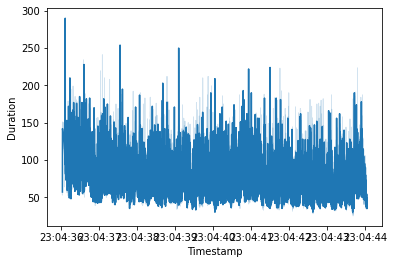

In [31]:
sea.lineplot(x="Timestamp", y="Duration", estimator=np.median, data=bo);

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

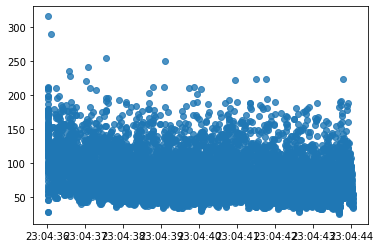

In [32]:
sea.regplot(x='Timestamp', y='Duration', data=bo)